In [1]:
import pandas as pd
import numpy as np
import re

# Load data
df = pd.read_csv("magicbricks_hyderabad_properties.csv")

# ---------- CLEAN PRICE ----------
def parse_price(val):
    if pd.isna(val):
        return np.nan
    cr = re.search(r'₹([\d\.]+)\s*Cr', val)
    if cr:
        return float(cr.group(1)) * 1e7   # Crore → Rupees
    lac = re.search(r'₹([\d\.]+)\s*Lac', val)
    if lac:
        return float(lac.group(1)) * 1e5  # Lakh → Rupees
    return np.nan

df["Price_Rs"] = df["Price"].apply(parse_price)

# ---------- CLEAN AREA ----------
def parse_area(val):
    if pd.isna(val):
        return np.nan
    m = re.search(r'(\d+)\s*sqft', val)
    return float(m.group(1)) if m else np.nan

df["Area_sqft"] = df["Property Type"].apply(parse_area)

# ---------- PRICE PER SQFT ----------
df["Price_per_sqft"] = df["Price_Rs"] / df["Area_sqft"]


In [2]:
df

,Price,Location,Property Type,Area,Posted Date,Price_Rs,Area_sqft,Price_per_sqft
0,₹7.80 Cr₹12000 per sqft,NaN,Super Area6500 sqftUnder ConstructionPoss. by ...,NaN,NaN,78000000.0,6500.0,12000.000000
1,₹1.58 Cr₹8217 per sqft,NaN,Super Area1930 sqftUnder ConstructionPoss. by ...,NaN,NaN,15800000.0,1930.0,8186.528497
2,₹4.52 Cr₹13755 per sqft,NaN,Super Area3287 sqftUnder ConstructionPoss. by ...,NaN,NaN,45200000.0,3287.0,13751.140858
3,₹1.07 Cr₹5903 per sqft,NaN,Super Area1823 sqftUnder ConstructionPoss. by ...,NaN,NaN,10700000.0,1823.0,5869.445968
4,₹5.74 Cr₹11500 per sqft,NaN,Super Area4999 sqftUnder ConstructionPoss. by ...,NaN,NaN,57400000.0,4999.0,11482.296459
...,...,...,...,...,...,...,...,...
145,"₹3.22 Cr₹11,891 per sqft",NaN,Carpet Area2100 sqftUnder ConstructionPoss. by...,NaN,NaN,32200000.0,2100.0,15333.333333
146,"₹1.50 Cr₹8,892 per sqft",NaN,Super Area1687 sqftUnder ConstructionPoss. by ...,NaN,NaN,15000000.0,1687.0,8891.523414
147,"₹1.93 Cr₹8,200 per sqft",NaN,Super Area2355 sqftUnder ConstructionPoss. by ...,NaN,NaN,19300000.0,2355.0,8195.329087
148,"₹20 Cr₹23,719 per sqft",NaN,Carpet Area7950 sqftUnder ConstructionPoss. by...,NaN,NaN,200000000.0,7950.0,25157.232704


In [4]:
# Convert price to numeric (Rs)
def parse_price(value):
    if pd.isna(value):
        return np.nan
    cr = re.search(r'₹([\d\.]+)\s*Cr', value)
    if cr:
        return float(cr.group(1)) * 1e7
    lac = re.search(r'₹([\d\.]+)\s*Lac', value)
    if lac:
        return float(lac.group(1)) * 1e5
    return np.nan

# Extract area in sqft
def parse_area(value):
    if pd.isna(value):
        return np.nan
    match = re.search(r'(\d+)\s*sqft', value)
    return float(match.group(1)) if match else np.nan

df["Price_Rs"] = df["Price"].apply(parse_price)
df["Area_sqft"] = df["Property Type"].apply(parse_area)

# Price per sqft
df["Price_per_sqft"] = df["Price_Rs"] / df["Area_sqft"]

# Remove missing values
df_clean = df.dropna(subset=["Price_Rs", "Area_sqft", "Price_per_sqft"])
df


,Price,Location,Property Type,Area,Posted Date,Price_Rs,Area_sqft,Price_per_sqft
0,₹7.80 Cr₹12000 per sqft,NaN,Super Area6500 sqftUnder ConstructionPoss. by ...,NaN,NaN,78000000.0,6500.0,12000.000000
1,₹1.58 Cr₹8217 per sqft,NaN,Super Area1930 sqftUnder ConstructionPoss. by ...,NaN,NaN,15800000.0,1930.0,8186.528497
2,₹4.52 Cr₹13755 per sqft,NaN,Super Area3287 sqftUnder ConstructionPoss. by ...,NaN,NaN,45200000.0,3287.0,13751.140858
3,₹1.07 Cr₹5903 per sqft,NaN,Super Area1823 sqftUnder ConstructionPoss. by ...,NaN,NaN,10700000.0,1823.0,5869.445968
4,₹5.74 Cr₹11500 per sqft,NaN,Super Area4999 sqftUnder ConstructionPoss. by ...,NaN,NaN,57400000.0,4999.0,11482.296459
...,...,...,...,...,...,...,...,...
145,"₹3.22 Cr₹11,891 per sqft",NaN,Carpet Area2100 sqftUnder ConstructionPoss. by...,NaN,NaN,32200000.0,2100.0,15333.333333
146,"₹1.50 Cr₹8,892 per sqft",NaN,Super Area1687 sqftUnder ConstructionPoss. by ...,NaN,NaN,15000000.0,1687.0,8891.523414
147,"₹1.93 Cr₹8,200 per sqft",NaN,Super Area2355 sqftUnder ConstructionPoss. by ...,NaN,NaN,19300000.0,2355.0,8195.329087
148,"₹20 Cr₹23,719 per sqft",NaN,Carpet Area7950 sqftUnder ConstructionPoss. by...,NaN,NaN,200000000.0,7950.0,25157.232704


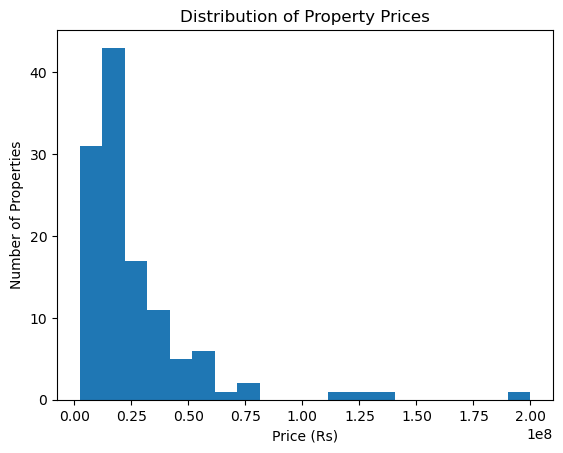

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df_clean["Price_Rs"], bins=20)
plt.title("Distribution of Property Prices")
plt.xlabel("Price (Rs)")
plt.ylabel("Number of Properties")
plt.show()


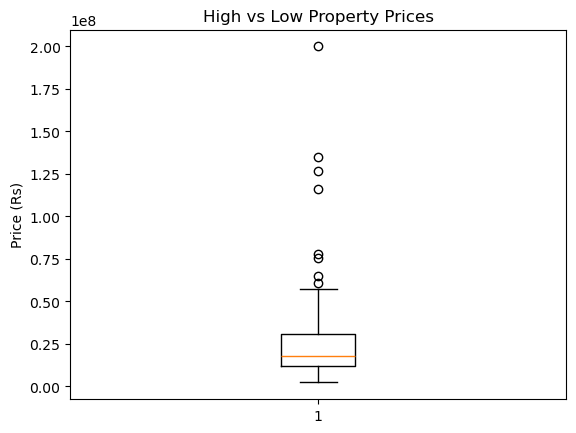

In [7]:
plt.figure()
plt.boxplot(df_clean["Price_Rs"])
plt.title("High vs Low Property Prices")
plt.ylabel("Price (Rs)")
plt.show()


In [8]:
print("Highest Price:", df_clean["Price_Rs"].max())
print("Lowest Price:", df_clean["Price_Rs"].min())
print("Price Difference:",
      df_clean["Price_Rs"].max() - df_clean["Price_Rs"].min())


Highest Price: 200000000.0
Lowest Price: 2280000.0
Price Difference: 197720000.0


In [9]:
highest_price = df.loc[df["Price_Rs"].idxmax()]
lowest_price  = df.loc[df["Price_Rs"].idxmin()]

print("HIGHEST PRICE PROPERTY")
print(highest_price[["Price_Rs", "Area_sqft", "Price_per_sqft"]])

print("\nLOWEST PRICE PROPERTY")
print(lowest_price[["Price_Rs", "Area_sqft", "Price_per_sqft"]])


HIGHEST PRICE PROPERTY
Price_Rs           200000000.0
Area_sqft               7950.0
Price_per_sqft    25157.232704
Name: 148, dtype: object

LOWEST PRICE PROPERTY
Price_Rs          1900000.0
Area_sqft               NaN
Price_per_sqft          NaN
Name: 83, dtype: object


In [10]:
price_difference = df["Price_Rs"].max() - df["Price_Rs"].min()
pps_difference   = df["Price_per_sqft"].max() - df["Price_per_sqft"].min()

print("Price Difference (Rs):", price_difference)
print("Price per Sqft Difference:", pps_difference)


Price Difference (Rs): 198100000.0
Price per Sqft Difference: 1141587.469822764


In [11]:
clean_df = df[[
    "Location",
    "Price_Rs",
    "Area_sqft",
    "Price_per_sqft"
]].dropna()

clean_df.head()


,Location,Price_Rs,Area_sqft,Price_per_sqft


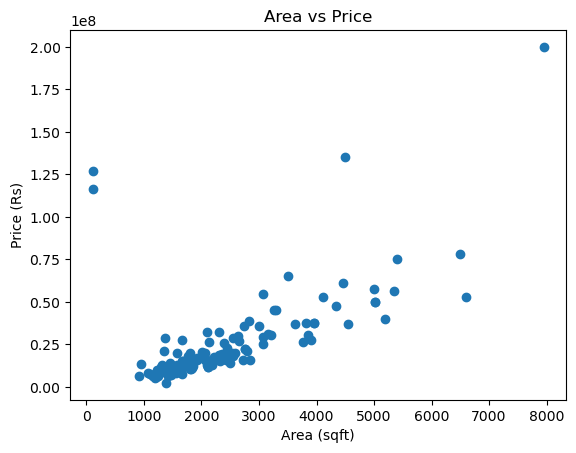

In [12]:
# ===== IMPORTS =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# ===== LOAD DATA =====
df = pd.read_csv("magicbricks_hyderabad_properties.csv")

# ===== CLEAN PRICE =====
def parse_price(value):
    if pd.isna(value):
        return np.nan
    cr = re.search(r'₹([\d\.]+)\s*Cr', value)
    if cr:
        return float(cr.group(1)) * 1e7
    lac = re.search(r'₹([\d\.]+)\s*Lac', value)
    if lac:
        return float(lac.group(1)) * 1e5
    return np.nan

# ===== CLEAN AREA =====
def parse_area(value):
    if pd.isna(value):
        return np.nan
    match = re.search(r'(\d+)\s*sqft', value)
    return float(match.group(1)) if match else np.nan

df["Price_Rs"] = df["Price"].apply(parse_price)
df["Area_sqft"] = df["Property Type"].apply(parse_area)

# Remove missing values
df_clean = df.dropna(subset=["Price_Rs", "Area_sqft"])

# ===== AREA vs PRICE GRAPH =====
plt.figure()
plt.scatter(df_clean["Area_sqft"], df_clean["Price_Rs"])
plt.title("Area vs Price")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (Rs)")
plt.show()


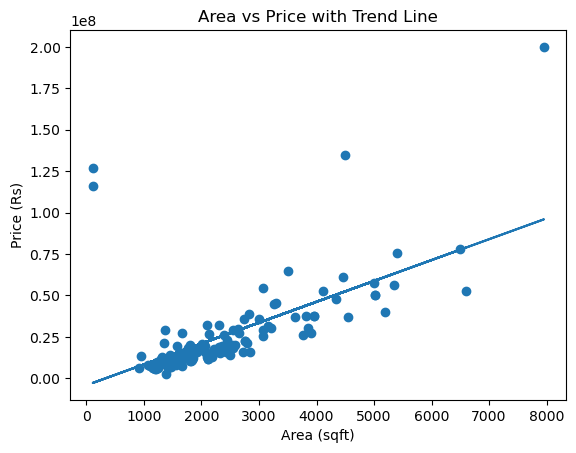

In [13]:
# ===== IMPORTS =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# ===== LOAD DATA =====
df = pd.read_csv("magicbricks_hyderabad_properties.csv")

# ===== CLEAN PRICE =====
def parse_price(value):
    if pd.isna(value):
        return np.nan
    cr = re.search(r'₹([\d\.]+)\s*Cr', value)
    if cr:
        return float(cr.group(1)) * 1e7
    lac = re.search(r'₹([\d\.]+)\s*Lac', value)
    if lac:
        return float(lac.group(1)) * 1e5
    return np.nan

# ===== CLEAN AREA =====
def parse_area(value):
    if pd.isna(value):
        return np.nan
    match = re.search(r'(\d+)\s*sqft', value)
    return float(match.group(1)) if match else np.nan

df["Price_Rs"] = df["Price"].apply(parse_price)
df["Area_sqft"] = df["Property Type"].apply(parse_area)

# Remove missing values
df_clean = df.dropna(subset=["Price_Rs", "Area_sqft"])

# ===== TREND LINE CALCULATION =====
x = df_clean["Area_sqft"]
y = df_clean["Price_Rs"]

m, c = np.polyfit(x, y, 1)
trend_line = m * x + c

# ===== PLOT =====
plt.figure()
plt.scatter(x, y)
plt.plot(x, trend_line)
plt.title("Area vs Price with Trend Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (Rs)")
plt.show()


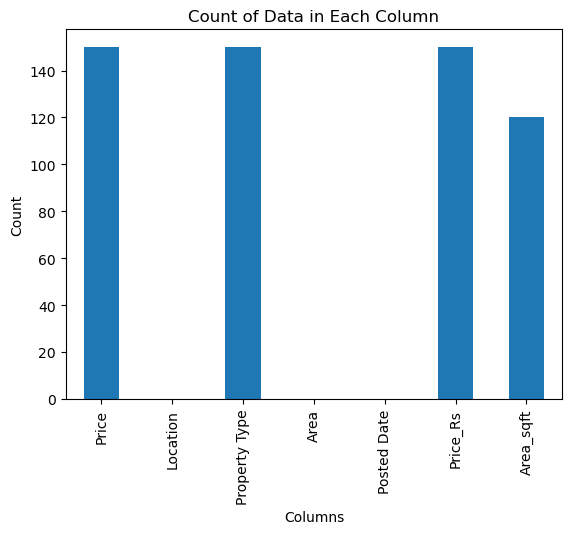

In [14]:
plt.figure()
df.count().plot(kind="bar")
plt.title("Count of Data in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.show()


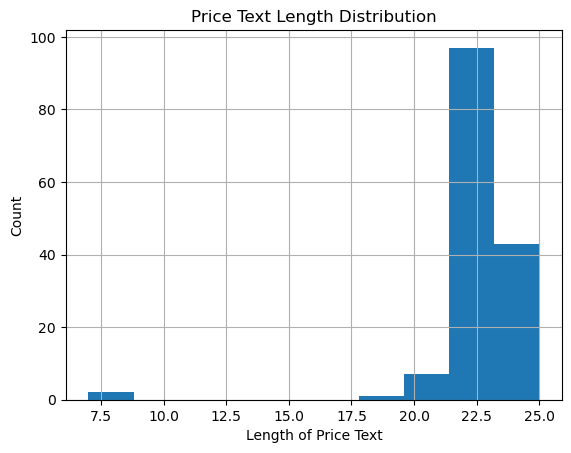

In [15]:
plt.figure()
df["Price"].dropna().str.len().hist(bins=10)
plt.title("Price Text Length Distribution")
plt.xlabel("Length of Price Text")
plt.ylabel("Count")
plt.show()


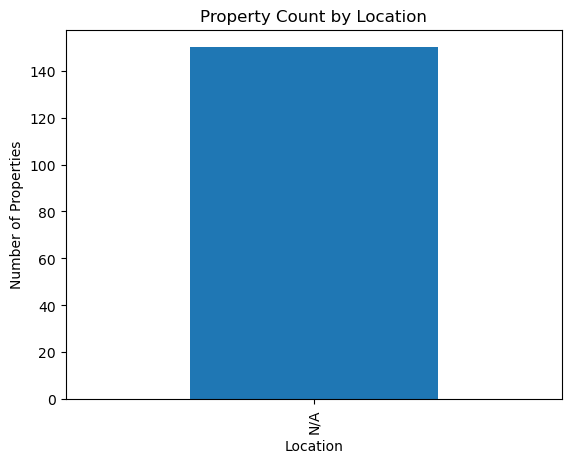

In [16]:
plt.figure()
df["Location"].fillna("N/A").value_counts().plot(kind="bar")
plt.title("Property Count by Location")
plt.xlabel("Location")
plt.ylabel("Number of Properties")
plt.show()


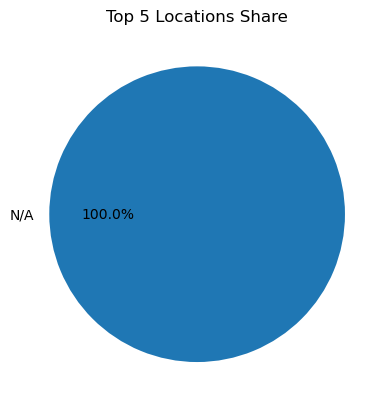

In [17]:
plt.figure()
df["Location"].fillna("N/A").value_counts().head(5).plot(kind="pie", autopct="%1.1f%%")
plt.title("Top 5 Locations Share")
plt.ylabel("")
plt.show()


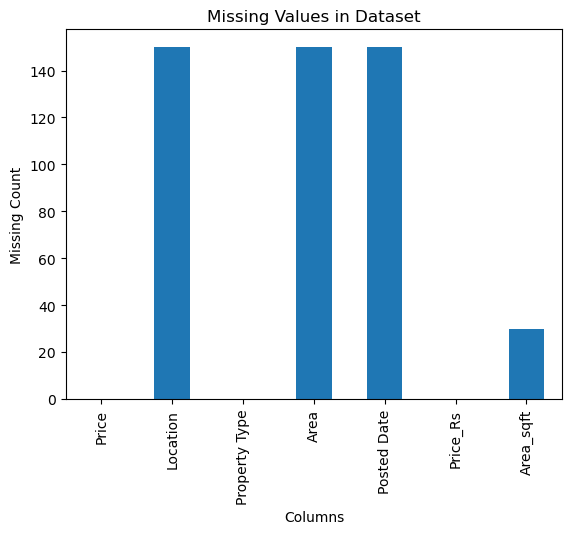

In [18]:
plt.figure()
df.isna().sum().plot(kind="bar")
plt.title("Missing Values in Dataset")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.show()
